This notebook uses 'Titanic dataset' to apply transformations to dataset using Pipeline API from SKlearn.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('http://bit.ly/kaggletrain')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Logistic Regression

In [4]:
#Importing necessary libraries to perform Logistic regression

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


logreg = LR()
df = df.astype({"Pclass": object})
features = df[['Age', 'Fare','Embarked', 'Sex', 'Pclass','Survived']]
features.drop('Survived',axis = 'columns',inplace = True)

/tmp/ipykernel_135019/1037733514.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop('Survived',axis = 'columns',inplace = True)


In [5]:
#splitting data into numeric and categorical features
numericFeatures = features.select_dtypes(include = np.number).columns
categoricalFeatures = features.select_dtypes(include = object).columns

In [6]:
print(numericFeatures)
print(categoricalFeatures)

Index(['Age', 'Fare'], dtype='object')
Index(['Embarked', 'Sex', 'Pclass'], dtype='object')


In [7]:
#Applying transformations to numerical and categorical values

numericTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categoricalTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericTransformer, numericFeatures),
        ('cat', categoricalTransformer, categoricalFeatures)])


In [8]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logreg)])
X = features
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("Logistic Regression model score: %.3f" % clf.score(X_test, y_test))

Logistic Regression model score: 0.754


In [9]:
cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

0.7901324461741258

In [10]:
X_train.columns

Index(['Age', 'Fare', 'Embarked', 'Sex', 'Pclass'], dtype='object')

In [11]:
X_new =pd.DataFrame([[16,8.05,'S','male','3']],columns = ['Age', 'Fare', 'Embarked', 'Sex', 'Pclass'])

In [12]:
clf.predict(X_new)

array([0])

Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=40,
                      max_features='auto')

In [14]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_classifier)])

X = features
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf.fit(X_train, y_train)
print("model score: %.3f" % rf.score(X_test, y_test))
                      

model score: 0.788


In [15]:
rf.predict(X_new)

array([0])

[Text(0.5909090909090909, 0.875, 'Sex_female <= 0.5\ngini = 0.477\nsamples = 456\nvalue = [433, 279]'),
 Text(0.36363636363636365, 0.625, 'Pclass_3 <= 0.5\ngini = 0.315\nsamples = 291\nvalue = [370, 90]'),
 Text(0.18181818181818182, 0.375, 'Pclass_2 <= 0.5\ngini = 0.401\nsamples = 127\nvalue = [148, 57]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.476\nsamples = 67\nvalue = [64, 41]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.269\nsamples = 60\nvalue = [84, 16]'),
 Text(0.5454545454545454, 0.375, 'Fare <= -0.495\ngini = 0.225\nsamples = 164\nvalue = [222, 33]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.144\nsamples = 108\nvalue = [154, 13]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.351\nsamples = 56\nvalue = [68, 20]'),
 Text(0.8181818181818182, 0.625, 'Pclass_3 <= 0.5\ngini = 0.375\nsamples = 165\nvalue = [63, 189]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.059\nsamples = 89\nvalue = [4, 127]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.5\nsamples = 76\nvalue = [59, 62]'

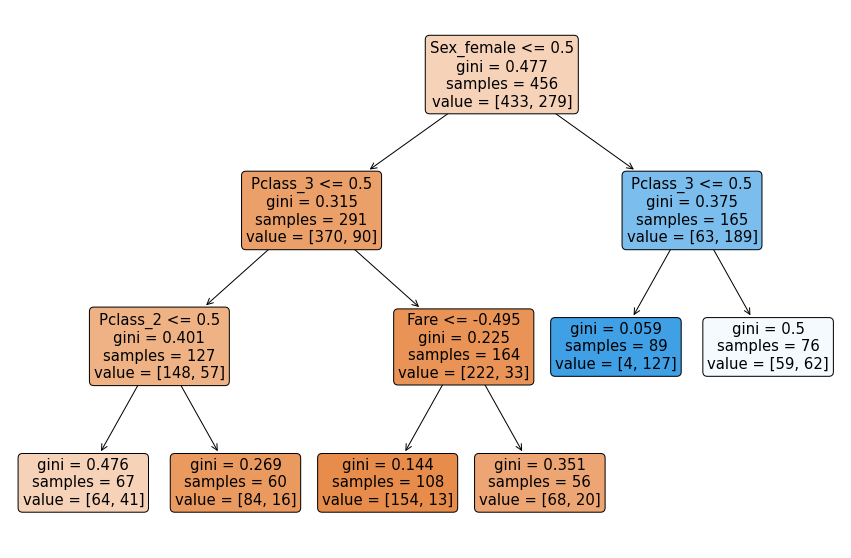

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names = ['Age','Fare','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_missing',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
          filled=True, impurity=True, 
          rounded=True)

In [94]:
catNames = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categoricalFeatures)


In [95]:
catNames

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_missing',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype=object)

In [104]:
from sklearn.metrics import classification_report

target_names = y_test.unique().astype(str)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.81      0.82      0.81       115
           0       0.67      0.66      0.66        64

    accuracy                           0.76       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [105]:
target_names = y_test.unique().astype(str)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.84      0.77      0.81       115
           0       0.64      0.73      0.69        64

    accuracy                           0.76       179
   macro avg       0.74      0.75      0.75       179
weighted avg       0.77      0.76      0.76       179

